In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
loan= pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
loan.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
loan.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
loan.Age.unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23], dtype=int64)

In [8]:
loan.Income.unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218], dtype=int64)

In [9]:
loan.Experience.unique() ## replacing all the negative numbers with positive numbers 


array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [10]:
loan.Experience.replace(-1,1,inplace=True)

In [11]:
loan.Experience.unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [12]:
loan.Experience.replace(-2,2,inplace=True)

In [13]:
loan.Experience.replace(-3,3,inplace=True)

In [14]:
loan.Experience.unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43], dtype=int64)

In [15]:
loan.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [16]:
loan.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


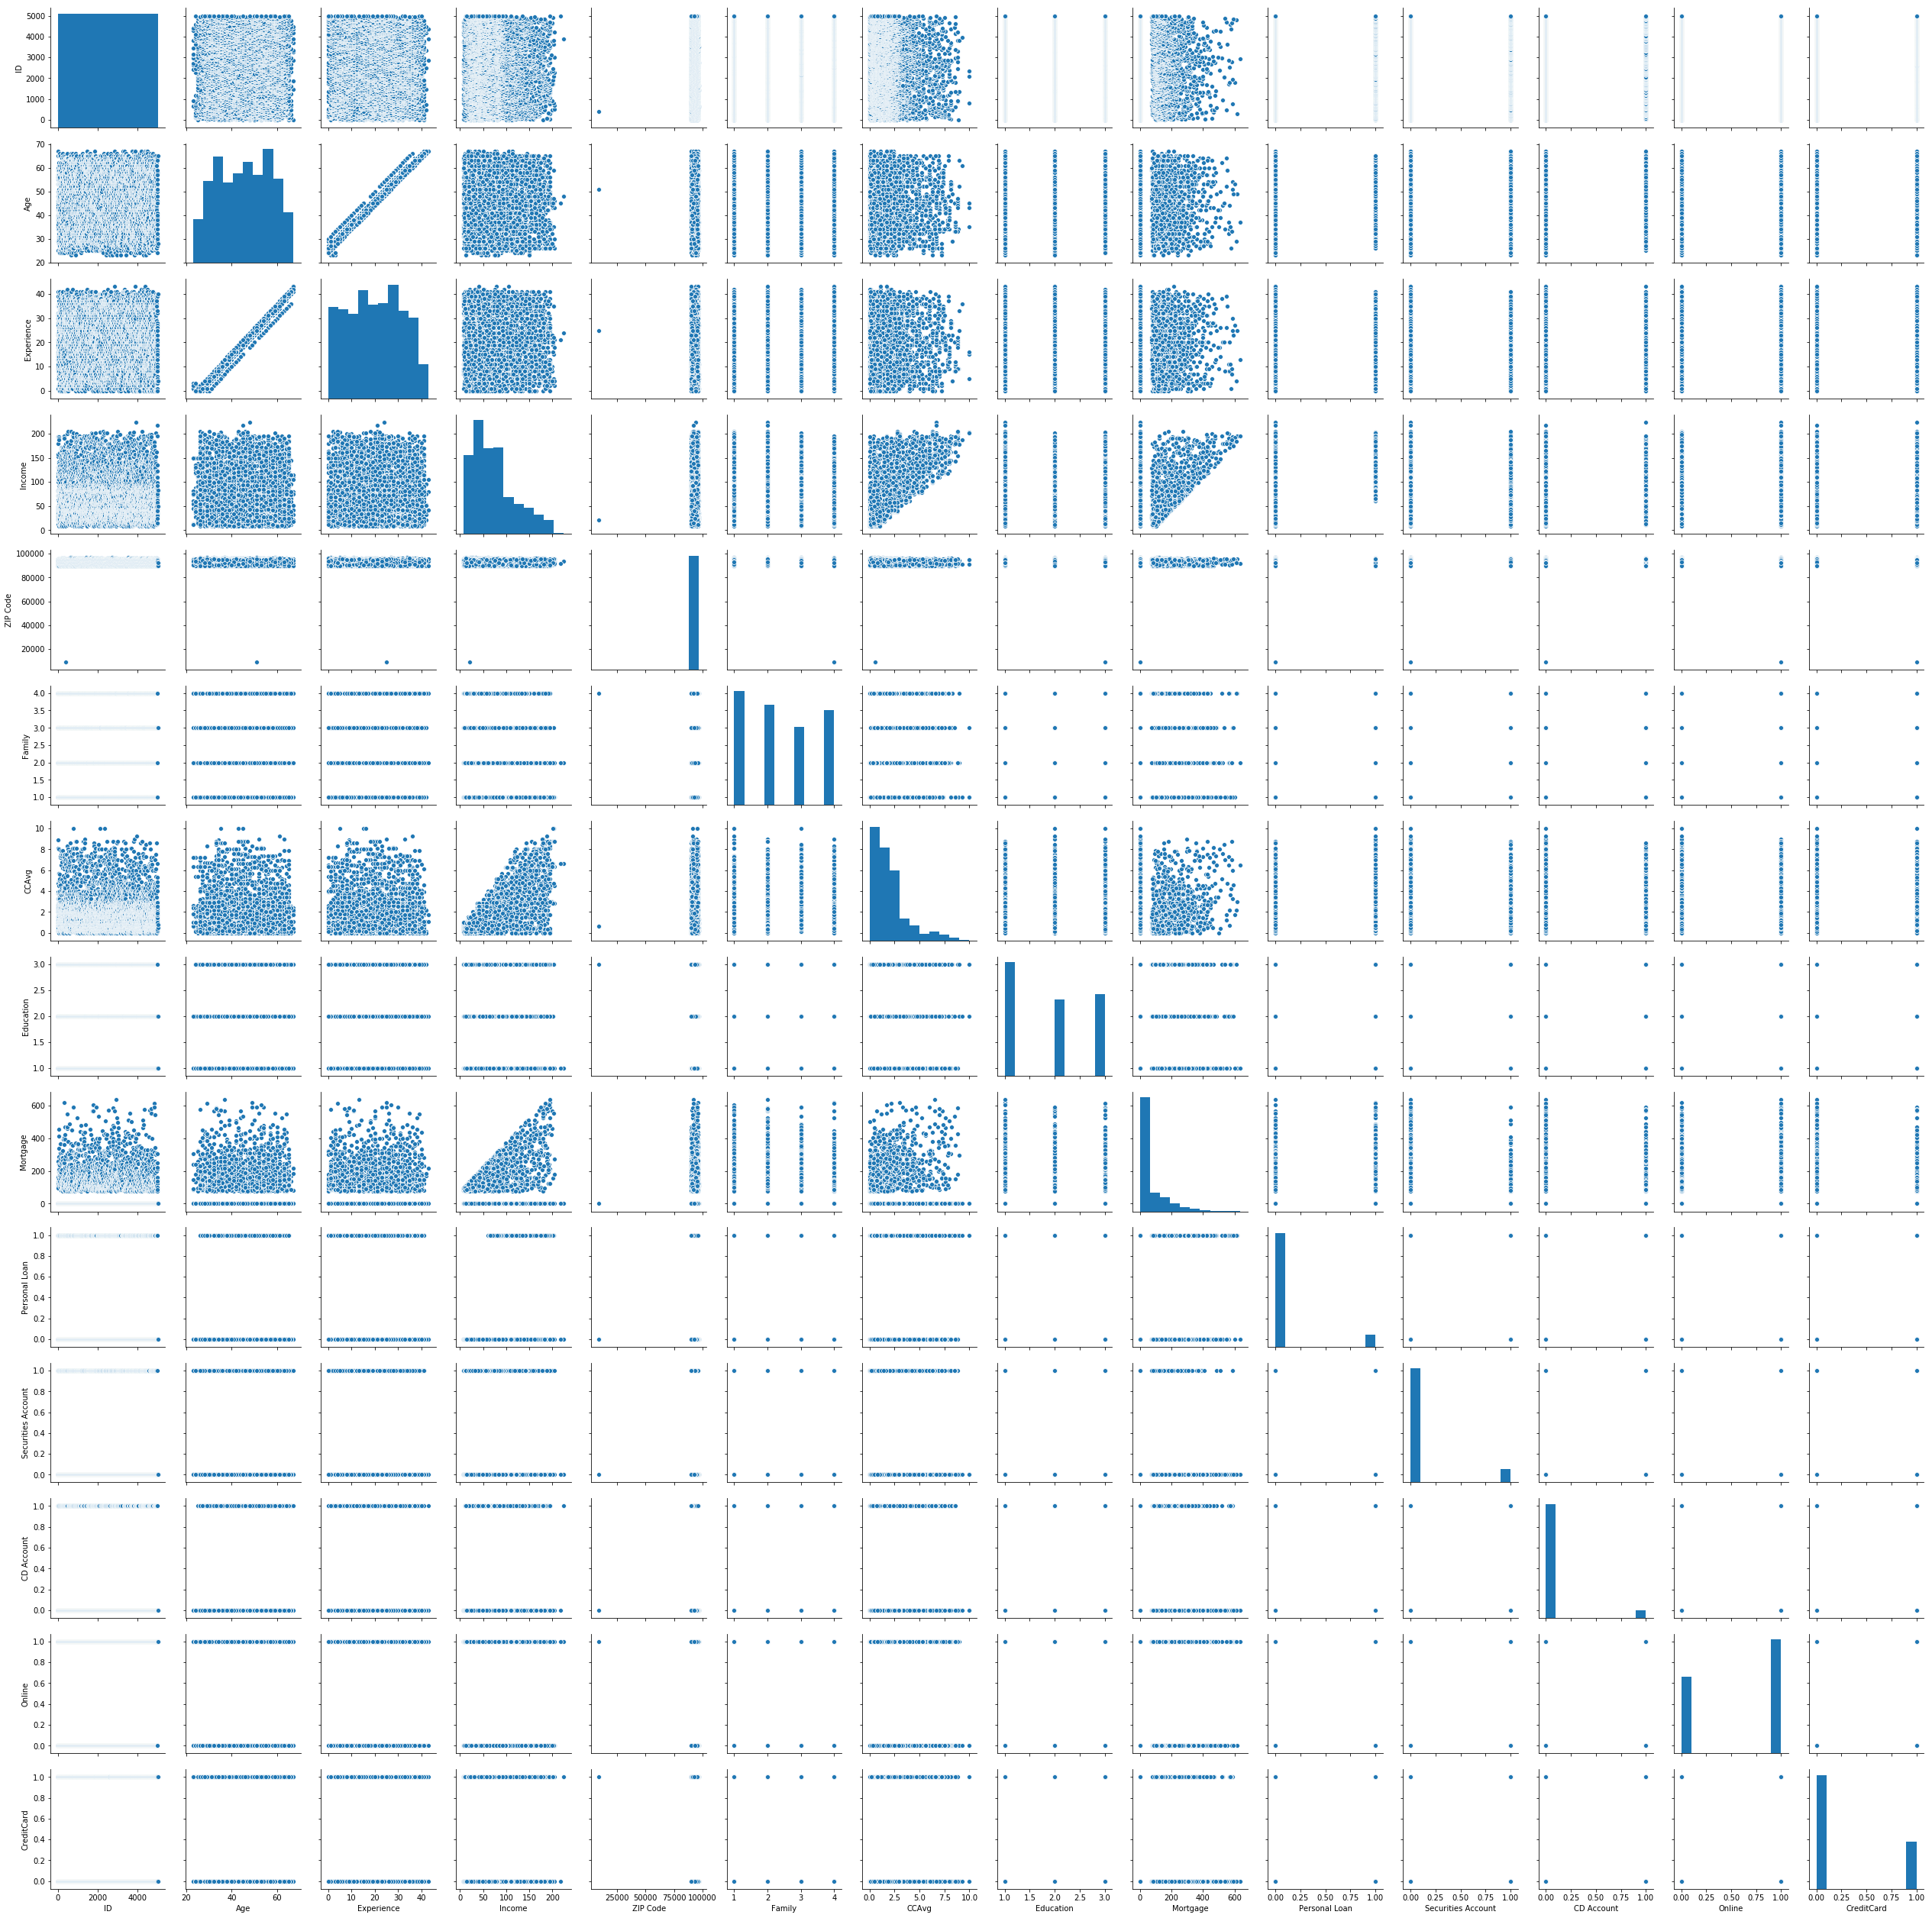

In [17]:
sns.pairplot(loan)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


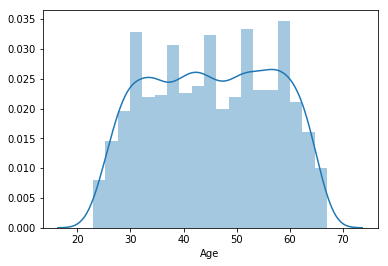

In [18]:
sns.distplot(loan.Age)

In [19]:
from scipy.stats import shapiro

In [20]:
shapiro(loan["Mortgage"])

(0.6281886696815491, 0.0)

In [21]:
shapiro(np.log(loan["Mortgage"]))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


(nan, 1.0)

In [22]:
loan[loan['Experience'] < 0]['Experience'].count()

0

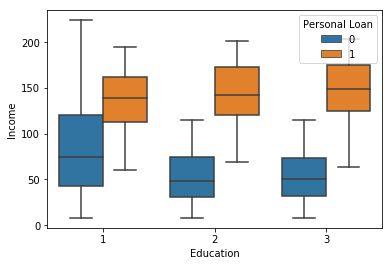

In [23]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=loan)

##  Models

## DT

In [24]:
X = loan.drop('Personal Loan', axis=1)
Y = loan['Personal Loan']

In [25]:
## split the data in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=100,test_size=0.3,stratify=Y)

In [46]:
from sklearn import tree

model = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3,max_leaf_nodes= 10,min_samples_leaf= 1,random_state=100)

In [47]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [51]:
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,cohen_kappa_score,classification_report,roc_curve,auc

print(accuracy_score(y_test, y_predict))
print(f1_score(y_test, y_predict))
print("Kappa Score:",cohen_kappa_score(y_test, y_predict))
print(classification_report(y_test,y_predict))
fpr,tpr,_= metrics.roc_curve(y_test,y_predict)
print(metrics.auc(fpr,tpr))

0.987
0.9265536723163843
Kappa Score: 0.91945277454212
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       906
           1       0.99      0.87      0.93        94

   micro avg       0.99      0.99      0.99      1000
   macro avg       0.99      0.94      0.96      1000
weighted avg       0.99      0.99      0.99      1000

0.9356183363862665


In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
grid_param = {"criterion":["entropy","gini"],"max_depth":np.arange(1,11),"max_leaf_nodes":np.arange(3,16),"min_samples_leaf":np.arange(1,20,2)}
grid=GridSearchCV(model,grid_param,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'max_leaf_nodes': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 1}

###  Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
from sklearn.model_selection import KFold

In [34]:
kf = KFold(n_splits=5,shuffle=True,random_state=100)
acc=[]
au=[]
for train,test in kf.split(X,Y):
    Model1 = LogisticRegression()
    X_train,X_test = X.iloc[train,:],X.iloc[test,:]
    y_train,y_test = Y[train],Y[test]
    Model1.fit(X_train,y_train)
    y_predict1=Model1.predict(X_test)
    acc.append(accuracy_score(y_test,y_predict1))
    fpr,tpr,_ = roc_curve(y_test,y_predict1)
    au.append(auc(fpr,tpr))
    
print("Cross validation AUC mean score:%.2f_%%" % np.mean(au))
print("Cross validation AUC var score:%.5f_%%" % np.var(au,ddof=1))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Cross validation AUC mean score:0.64_%
Cross validation AUC var score:0.00079_%


In [35]:
print(f1_score(y_test,y_predict1))
print(accuracy_score(y_test,y_predict1))

0.3829787234042553
0.913


In [36]:
print(cohen_kappa_score(y_test,y_predict1))

0.34172694531037184


In [52]:
fpr,tpr,_= metrics.roc_curve(y_test,y_predict1)
print(metrics.auc(fpr,tpr))

0.6325794936827768


##  Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

prediction = naive_model.predict(X_test)
print(f1_score(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(cohen_kappa_score(y_test,prediction))
fpr,tpr,_ = roc_curve(y_test,prediction)
print(auc(fpr,tpr))

0.4975609756097561
0.897
0.44061868659439973
0.7381640129632239


## KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn=KNeighborsClassifier(n_neighbors=3,p=4)
ypred_Knn = knn.fit(X_train,y_train).predict(X_test)

In [43]:
import sklearn.metrics as metrics

In [44]:
print('F1 Score:',metrics.f1_score(y_test,ypred_Knn,average='weighted'))
print('Kappa Score:',metrics.cohen_kappa_score(y_test,ypred_Knn))
f1_knn=metrics.f1_score(y_test,ypred_Knn,average='weighted')
kappa_knn=metrics.cohen_kappa_score(y_test,ypred_Knn)

F1 Score: 0.8660269650274944
Kappa Score: 0.06311454120440807


In [45]:
print('Accuracy:',metrics.accuracy_score(y_test,ypred_Knn))
acc_knn=metrics.accuracy_score(y_test,ypred_Knn)
fpr,tpr,_=metrics.roc_curve(y_test,ypred_Knn)
auc_knn=metrics.auc(fpr,tpr)
auc_knn

Accuracy: 0.899


0.5199732281245596

In [53]:
final=pd.DataFrame({'Model':['DT','Log Reg','NB','KNN'],
                    'F1_Score':['0.926553','0.382978','0.497560','0.866026'],
                    'Kappa_Score':['0.919452','0.341726','0.440618','0.063114'],
                    'Accuracy':['0.987','0.913','0.897','0.899'],
                    'AUC':['0.935618','0.632579','0.738164','0.519973']})

In [54]:
final

,Model,F1_Score,Kappa_Score,Accuracy,AUC
0,DT,0.926553,0.919452,0.987,0.935618
1,Log Reg,0.382978,0.341726,0.913,0.632579
2,NB,0.497560,0.440618,0.897,0.738164
3,KNN,0.866026,0.063114,0.899,0.519973
